In [1]:
import pandas as pd 
import cv2
import numpy as np
import os
from glob import glob
import math
import matplotlib.pyplot as plt
import re
import html
import string
import unicodedata
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.model_selection import train_test_split

import torch
nltk.download('punkt')
nltk.download('stopwords')
stopwords.words('english')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
df_cxr = pd.read_csv(r"F:\physionet.org\files\mimic-cxr\2.0.0\findings_data_8.csv")

In [3]:
df_cxr.head()

,DICOM Image Name,Text File Path,Patient ID,Subfolder ID,Findings
0,s50414267\02aa804e-bde0afdd-112c0b34-7bc16630-...,F:\physionet.org\files\mimic-cxr\2.0.0\files\p...,10000032,s50414267,"There is no focal consolidation, pleural effus..."
1,s50414267\174413ec-4ec4c1f7-34ea26b7-c5f994f8-...,F:\physionet.org\files\mimic-cxr\2.0.0\files\p...,10000032,s50414267,"There is no focal consolidation, pleural effus..."
2,s53189527\2a2277a9-b0ded155-c0de8eb9-c124d10e-...,F:\physionet.org\files\mimic-cxr\2.0.0\files\p...,10000032,s53189527,"The cardiac, mediastinal and hilar contours ar..."
3,s53189527\e084de3b-be89b11e-20fe3f9f-9c8d8dfe-...,F:\physionet.org\files\mimic-cxr\2.0.0\files\p...,10000032,s53189527,"The cardiac, mediastinal and hilar contours ar..."
4,s53911762\68b5c4b1-227d0485-9cc38c3f-7b84ab51-...,F:\physionet.org\files\mimic-cxr\2.0.0\files\p...,10000032,s53911762,Single frontal view of the chest provided.\n \...


In [4]:
df_cxr['DICOM Image Name'].iloc[0]

's50414267\\02aa804e-bde0afdd-112c0b34-7bc16630-4e384014.dcm'

In [5]:
df_cxr['Text File Path'].iloc[0]

'F:\\physionet.org\\files\\mimic-cxr\\2.0.0\\files\\p10\\p10000032\\s50414267.txt'

In [6]:
df_cxr['image'] = df_cxr.apply(lambda row: os.path.join(os.path.dirname(row['Text File Path']), row['DICOM Image Name']), axis=1)


In [7]:
df_cxr['image'].iloc[0]

'F:\\physionet.org\\files\\mimic-cxr\\2.0.0\\files\\p10\\p10000032\\s50414267\\02aa804e-bde0afdd-112c0b34-7bc16630-4e384014.dcm'

In [ ]:
df_cxr.dropna(inplace=True)

In [18]:
def remove_chars(text):
    try : 
        text = re.sub(r'\b(?:\d+|\w)\b\s*', '', text)
    except Exception as e:
        print(text)
    re1 = re.compile(r'  +')
    x1 = text.lower().replace('#39;', "'").replace('amp;', '&').replace('#146;', "'").replace(
        'nbsp;', ' ').replace('#36;', '$').replace('\\n', "\n").replace('quot;', "'").replace(
        '<br />', "\n").replace('\\"', '"').replace('<unk>', 'u_n').replace(' @.@ ', '.').replace(
        ' @-@ ', '-').replace('\\', ' \\ ')
    return re1.sub(' ', html.unescape(x1))

def clean_Mimic(text):
    cleaned_item = re.sub(r'[-/)\\;(//:,_.\?]', ' ', text)
    cleaned_item = re.sub(r'[^a-zA-Z0-9\s]', '', cleaned_item).lower()
    cleaned_item = re.sub(r'[^a-zA-Z\s]', '', cleaned_item).lower()

    cleaned_item = ' '.join(cleaned_item.split())  # Remove extra spaces
    return cleaned_item

def clean_x(text):
    cleaned_text = re.sub(r'x{3,}', '', text)
    return cleaned_text

def remove_non_ascii(text):

    return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')


def to_lowercase(text):
    return text.lower()

def remove_punctuation(text):
 
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)


def replace_numbers(text):

    return re.sub(r'\d+', '', text)


def remove_whitespaces(text):
    return text.strip()


def remove_stopwords(words, stop_words):

    return [word for word in words if word not in stop_words]


def stem_words(words):
 
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in words]

def lemmatize_words(words):

    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in words]

def lemmatize_verbs(words):

    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(word, pos='v') for word in words])

def text2words(text):
    return word_tokenize(text)

def normalize_text( text):
    text = remove_chars(text)
    text = clean_x(text)
    text = clean_Mimic(text)
    text = remove_non_ascii(text)
#     text = remove_punctuation(text)
    text = to_lowercase(text)
    text = replace_numbers(text)
    words = text2words(text)
    stop_words = stopwords.words('english')
    words = remove_stopwords(words, stop_words)
    #words = stem_words(words)# Either stem ovocar lemmatize
    words = lemmatize_words(words)
    words = lemmatize_verbs(words)
#     print(words)

    return words
  
def normalize_corpus(corpus):
    return [normalize_text(t) for t in corpus]

In [19]:
import re

# df_clean['Findings'] = df_clean['Findings'].apply(lambda x: re.sub(r'\n+', '\n', x).strip())
df_cxr['Findings'] = df_cxr['Findings'].apply(lambda x: normalize_text(x))

In [20]:
df_cxr['Findings'].iloc[0]

'focal consolidation pleural effusion pneumothorax bilateral nodular opacity likely represent nipple shadow cardiomediastinal silhouette normal clip project leave lung potentially within breast image upper abdomen unremarkable chronic deformity posterior leave sixth seventh rib note impression acute cardiopulmonary process'

In [26]:
annotations_list = []

for index, row in df_cxr.iterrows():
    annotation = {
        'image_id': row['image'],
        'caption': row['Findings']
    }
    annotations_list.append(annotation)

result_dict = {
    "annotations": annotations_list
}

In [28]:
len(result_dict)

1

In [31]:
import json
output_json_path = "output_annotations.json"

# Save the result_dict as a JSON file
with open(output_json_path, "w") as json_file:
    json.dump(result_dict, json_file)

print(f"JSON data saved to {output_json_path}")

JSON data saved to output_annotations.json


# IU Part -2

In [51]:
import pandas as pd 
import cv2
import numpy as np
import os
from glob import glob
import math
import matplotlib.pyplot as plt
import re
import html
import string
import unicodedata
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.model_selection import train_test_split

import torch
nltk.download('punkt')
nltk.download('stopwords')
stopwords.words('english')
nltk.download('wordnet')

df2 = pd.read_csv(r"F:\Data_kaggle\indiana_projections.csv")
df1 = pd.read_csv(r"F:\Data_kaggle\indiana_reports.csv")

images_captions_df = pd.DataFrame({'image': [],
                                    'caption': []})
for i in range(len(df2)):
    uid = df2.iloc[i]['uid']
    image = df2.iloc[i]['filename']
    index = df1.loc[df1['uid'] ==uid]
    
    if not index.empty:    
        index = index.index[0]
        caption = df1.iloc[index]['findings']
        if type(caption) == float:
         
            continue 
        images_captions_df = pd.concat([images_captions_df, pd.DataFrame([{'image': image, 'caption': caption}])], ignore_index=True)


images_captions_df = pd.DataFrame({'uid':[], 'image': [],
                                    'caption': [], 'projection':[]})
for i in range(len(df2)):
    uid = df2.iloc[i]['uid']
    image = df2.iloc[i]['filename']
    projection = df2.iloc[i]['projection']
    uid = int(df2.iloc[i]['uid'])
    index = df1.loc[df1['uid'] ==uid]
    
    if not index.empty:    
        index = index.index[0]
        caption = str(df1.iloc[index]['findings'])+str(df1.iloc[index]['impression'])
        if type(caption) == float:
         
            continue 
        images_captions_df = pd.concat([images_captions_df, pd.DataFrame([{'uid':uid, 'image': image, 'caption': caption, 'projection':projection }])], ignore_index=True)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [52]:
def remove_chars(text):
    try : 
        text = re.sub(r'\b(?:\d+|\w)\b\s*', '', text)
    except Exception as e:
        print(text)
    re1 = re.compile(r'  +')
    x1 = text.lower().replace('#39;', "'").replace('amp;', '&').replace('#146;', "'").replace(
        'nbsp;', ' ').replace('#36;', '$').replace('\\n', "\n").replace('quot;', "'").replace(
        '<br />', "\n").replace('\\"', '"').replace('<unk>', 'u_n').replace(' @.@ ', '.').replace(
        ' @-@ ', '-').replace('\\', ' \\ ')
    return re1.sub(' ', html.unescape(x1))

def clean_Mimic(text):
    cleaned_item = re.sub(r'[-/)\\;(//:,_.\?]', ' ', text)
    cleaned_item = re.sub(r'[^a-zA-Z0-9\s]', '', cleaned_item).lower()
    cleaned_item = re.sub(r'[^a-zA-Z\s]', '', cleaned_item).lower()

    cleaned_item = ' '.join(cleaned_item.split())  # Remove extra spaces
    words_to_remove = ['there', 'is', 'are', 'of', 'and', 'the']
    cleaned_text = ' '.join([word for word in cleaned_item.split() if word.lower() not in words_to_remove])

    # Remove extra spaces
    cleaned_text = ' '.join(cleaned_text.split())
    return cleaned_text

def clean_x(text):
    cleaned_text = re.sub(r'x{3,}', '', text)
    return cleaned_text

def remove_non_ascii(text):

    return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')


def to_lowercase(text):
    return text.lower()

def remove_punctuation(text):
 
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)


def replace_numbers(text):

    return re.sub(r'\d+', '', text)


def remove_whitespaces(text):
    return text.strip()


def remove_stopwords(words, stop_words):

    return [word for word in words if word not in stop_words]


def stem_words(words):
 
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in words]

def lemmatize_words(words):

    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in words]

def lemmatize_verbs(words):

    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(word, pos='v') for word in words])

def text2words(text):
    return word_tokenize(text)

def normalize_text( text):
    text = remove_chars(text)
    text = clean_x(text)
    text = clean_Mimic(text)
#     text = remove_non_ascii(text)
#     text = remove_punctuation(text)
    text = to_lowercase(text)
#     text = replace_numbers(text)
#     words = text2words(text)
#     stop_words = stopwords.words('english')
#     words = remove_stopwords(words, stop_words)
    #words = stem_words(words)# Either stem ovocar lemmatize
#     words = lemmatize_words(words)
#     words = lemmatize_verbs(words)
#     print(words)

    return text
  
def normalize_corpus(corpus):
    return [normalize_text(t) for t in corpus]

In [53]:
images_captions_df['image'] = 'F:\\Data_kaggle\\images\\images_normalized\\' + images_captions_df['image']

In [54]:
real_caption = normalize_text("There is XXXX increased opacity within the right upper lobe with possible mass and associated area of atelectasis or focal consolidation. The cardiac silhouette is within normal limits. XXXX opacity in the left midlung overlying the posterior left 5th rib may represent focal airspace disease. No pleural effusion or pneumothorax. No acute bone abnormality.")

real_caption

'increased opacity within right upper lobe with possible mass associated area atelectasis or focal consolidation cardiac silhouette within normal limits opacity in left midlung overlying posterior left th rib may represent focal airspace disease no pleural effusion or pneumothorax no acute bone abnormality'

In [55]:
images_captions_df_clean = images_captions_df.copy()
images_captions_df_clean['caption'] = images_captions_df_clean['caption'].apply(lambda x: normalize_text(x))


In [56]:
images_captions_df_clean['caption'].iloc[0]

'cardiac silhouette mediastinum size within normal limits no pulmonary edema no focal consolidation no pleural effusion no evidence pneumothorax normal chest'

In [57]:
images_captions_df_clean.dropna(inplace=True)

In [58]:
images_captions_df_clean.shape

(7466, 4)

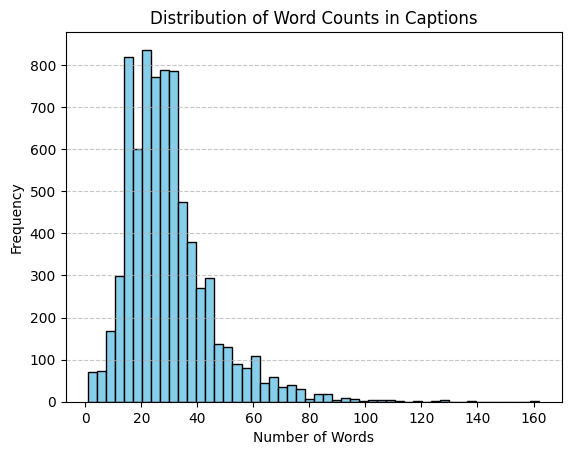

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have a DataFrame named images_captions_df_clean
# If not, you can load your data into a DataFrame

# Split the 'caption' column into words and count the number of words
word_counts = images_captions_df_clean['caption'].apply(lambda x: len(x.split()))

# Create a histogram of word counts
plt.hist(word_counts, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Distribution of Word Counts in Captions')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


In [60]:
import pandas as pd


images_captions_df_clean = images_captions_df_clean[images_captions_df_clean['caption'].apply(lambda x: len(x.split())) >= 4]

images_captions_df_clean.reset_index(drop=True, inplace=True)
images_captions_df_clean.shape

(7400, 4)

In [61]:
annotations_list = []

for index, row in images_captions_df_clean.iterrows():
    annotation = {
        'image_id': row['image'],
        'caption': row['caption']
    }
    annotations_list.append(annotation)

result_dict = {
    "annotations": annotations_list
}

In [62]:
import json
output_json_path = r"F:\Data_kaggle\images\list_1\filter_cap.json"

# Save the result_dict as a JSON file
with open(output_json_path, "w") as json_file:
    json.dump(result_dict, json_file)

print(f"JSON data saved to {output_json_path}")

JSON data saved to F:\Data_kaggle\images\list_1\filter_cap.json
